In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AffinityPropagation
from itertools import cycle

In [3]:
dataset=pd.read_csv("Mall_Customers.csv")
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [32]:
x=dataset.iloc[:,[3,4]].values
dataset1=dataset[["Age","Annual Income (k$)","Spending Score (1-100)"]]
dataset2=dataset[["Age","Genre","Annual Income (k$)","Spending Score (1-100)"]]

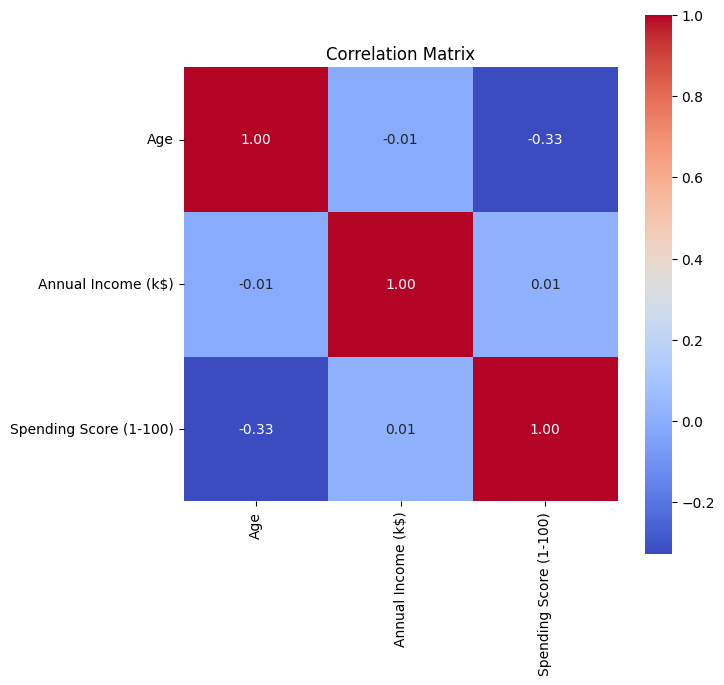

In [33]:
correlation_matrix = dataset1.corr()
plt.figure(figsize=(7, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f",square=True)
plt.title("Correlation Matrix")
plt.show()

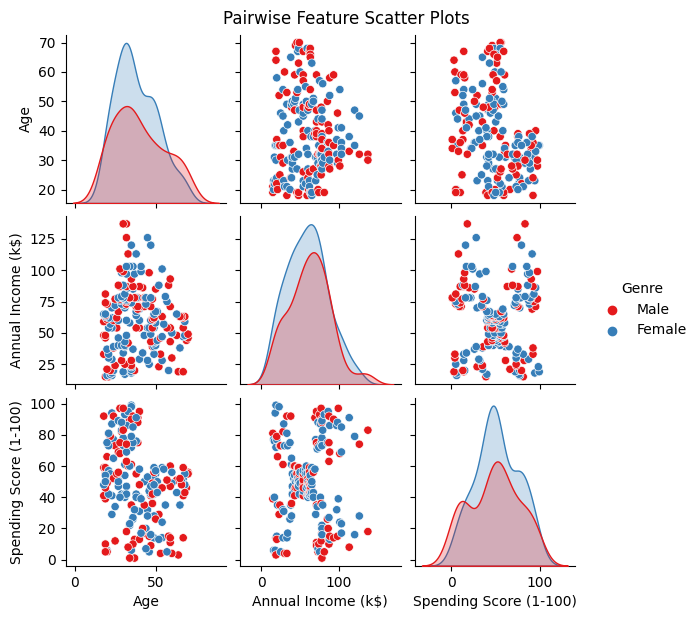

In [34]:
sns.pairplot(dataset2, palette="Set1", hue="Genre", diag_kind="kde", height=2)
plt.suptitle("Pairwise Feature Scatter Plots", y=1.02)
plt.show()

In [35]:
af = AffinityPropagation(preference=15, max_iter=10, damping=0.9,
                         random_state=0, convergence_iter=100).fit(x)

cluster_labels = af.labels_
print("Cluster labels:", cluster_labels)

Cluster labels: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1]


C:\Users\Dayana\anaconda3\envs\aiml\lib\site-packages\sklearn\cluster\_affinity_propagation.py:253: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  ConvergenceWarning,


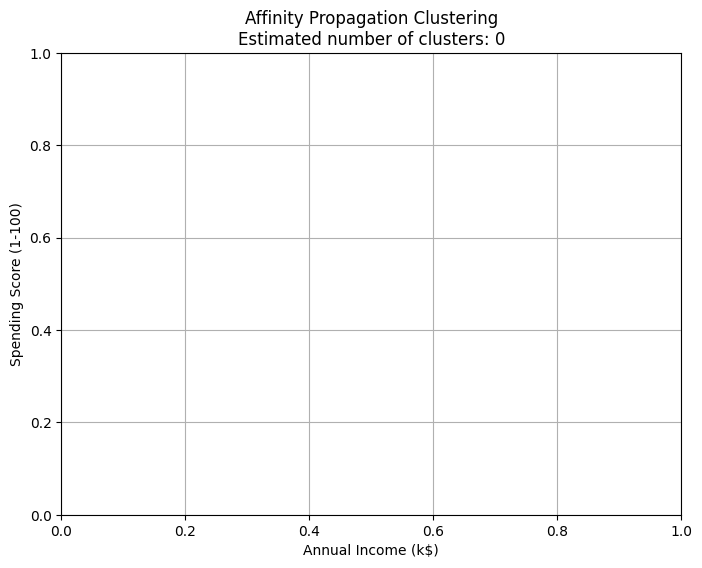

In [36]:
plt.figure(figsize=(8, 6))
colors = cycle('bgrcmyk')

n_clusters_ = len(af.cluster_centers_indices_)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = x.iloc[cluster_centers_indices[k]]

    plt.plot(x.iloc[class_members, 0], x.iloc[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o',
             markerfacecolor=col, markeredgecolor='k', markersize=14)

    for X in x.iloc[class_members].values:
        plt.plot([cluster_center[0], X[0]], [cluster_center[1], X[1]], col, alpha=0.3)

plt.title(f'Affinity Propagation Clustering\nEstimated number of clusters: {n_clusters_}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()